#  023 Plotting Graphs : Answers to exercises

#### Exercise 1

We have seen how to access the dataset labels using:

    headings = df.columns[1:-1]
  
* Copy the code to read the HadSEEP monthly datasets above
* Write and run code that plots the precipitation data for all months separate subplots.

In [8]:
# ANSWER 
# Copy the code to read the HadSEEP monthly datasets above
import pandas as pd
from urlpath import URL
from pathlib import Path

# Monthly Southeast England precipitation (mm) 
site = 'https://www.metoffice.gov.uk/'
site_dir = 'hadobs/hadukp/data/monthly'
site_file = 'HadSEEP_monthly_totals.txt'

url = URL(site,site_dir,site_file)

r = url.get()
if r.status_code == 200:
    # setup Path object for output file
    filename = Path('work',url.name)
    # write text data
    filename.write_text(r.text)
    # check size and report
    print(f'file {filename} written: {filename.stat().st_size} bytes')
    
    df=pd.read_table(filename,**panda_format)
    # df.head: first n lines
    ok= True
else:
    print(f'failed to get {url}')

panda_format = {
    'skiprows'   :  3,
    'na_values'  :  [-99.9],
    'sep'        :  r"[ ]{1,}",
    'engine'     :  'python'
}

df=pd.read_table(filename,**panda_format)

# df.head: first n lines
df.head()

file work/HadSEEP_monthly_totals.txt written: 15209 bytes


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
0,1873,87.1,50.4,52.9,19.9,41.1,63.6,53.2,56.4,62.0,86.0,59.4,15.7,647.7
1,1874,46.8,44.9,15.8,48.4,24.1,49.9,28.3,43.6,79.4,96.1,63.9,52.3,593.5
2,1875,96.9,39.7,22.9,37.0,39.1,76.1,125.1,40.8,54.7,137.7,106.4,27.1,803.5
3,1876,31.8,71.9,79.5,63.6,16.5,37.2,22.3,66.3,118.2,34.1,89.0,162.9,793.3
4,1877,146.0,47.7,56.2,66.4,62.3,24.9,78.5,82.4,38.4,58.1,144.5,54.2,859.6


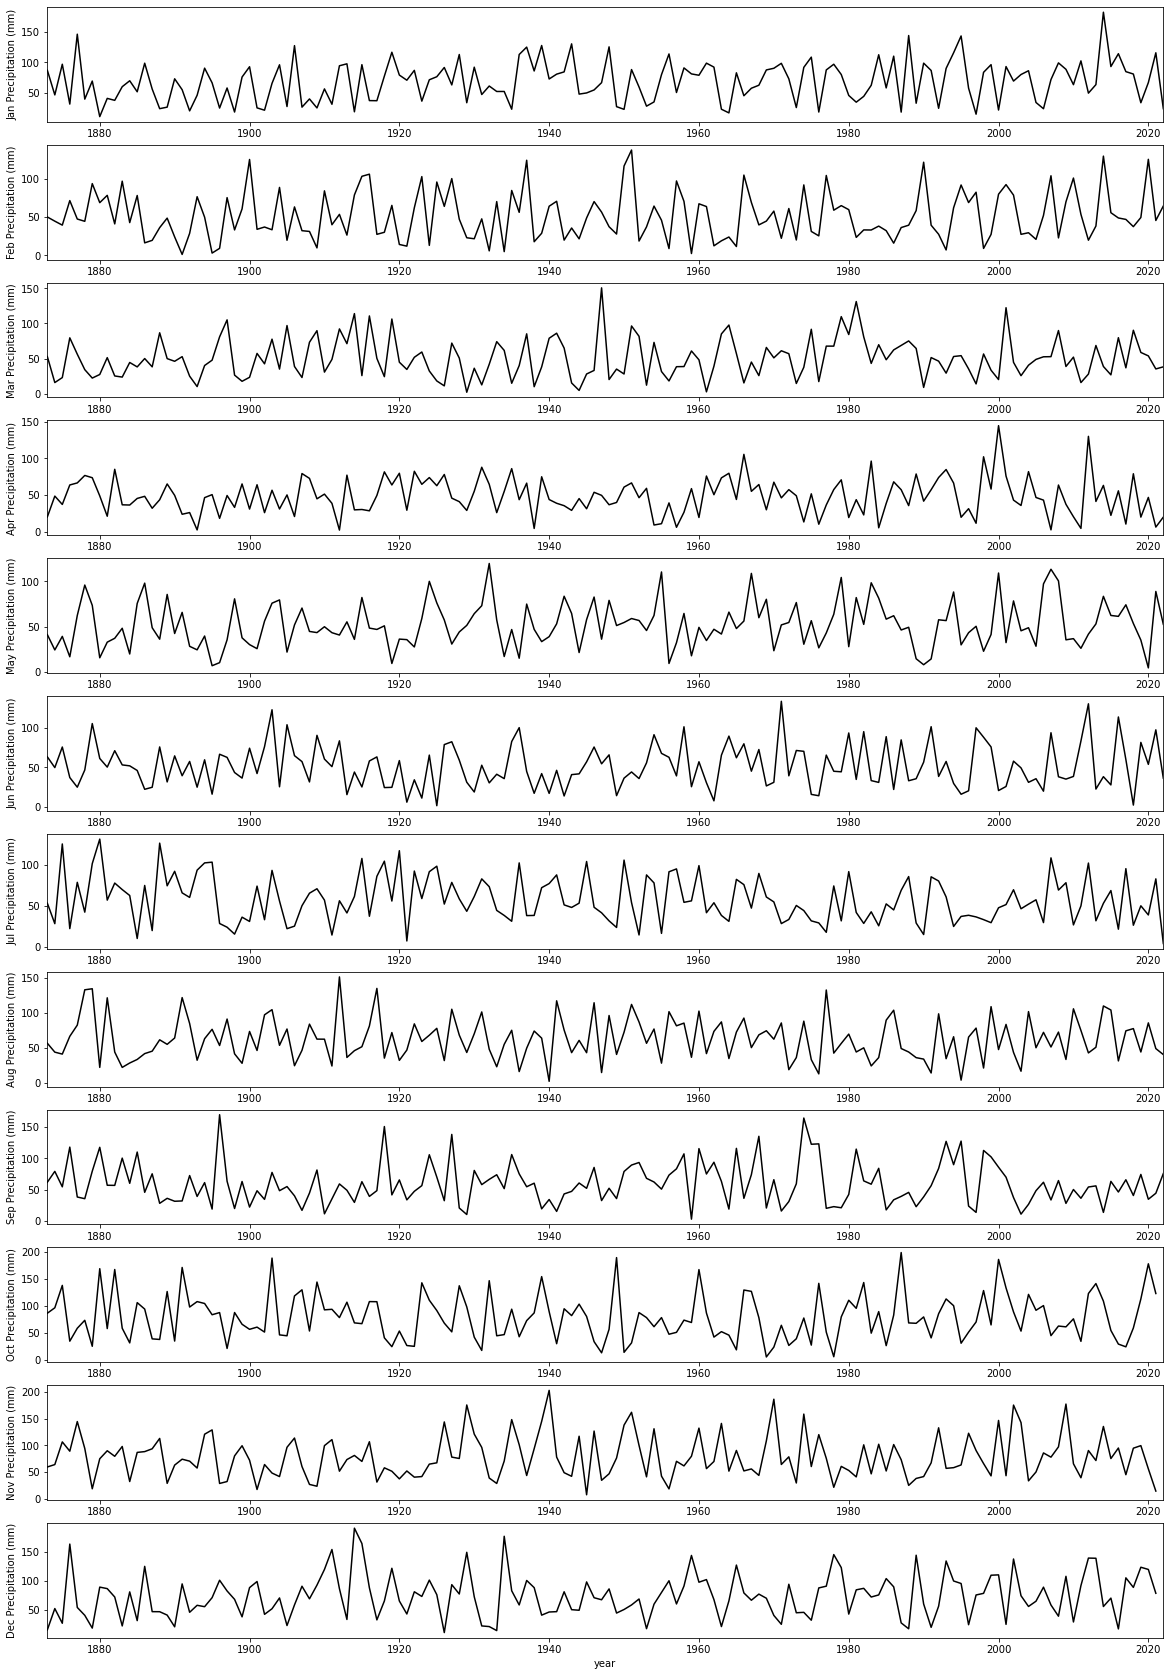

In [9]:
# ANSWER 2
# Write and run code that plots the 
# precipitation data for all months separate subplots.
import matplotlib.pyplot as plt

# plot size > in y
# need to play with this to get it right
x_size,y_size = 20,30

# get the m onth names from columns
months = df.columns[1:-1]

fig, axs = plt.subplots(12,1,figsize=(x_size,y_size))

# use enumerate in the loop, to get the index
for i,m in enumerate(months):
    # plot y-data and set the label for the first panel
    axs[i].plot(df["Year"],df[m],'k',label=m)
    axs[i].set_ylabel(f'{m} Precipitation (mm)')
    axs[i].set_xlim(year0,year1)

# x-label
_=axs[-1].set_xlabel(f'year')

#### Exercise 2
* Read the `2276931.csv` dataset into a pandas dataframe called `df`
* Convert the field `df["DATE"]` to a list called `dates`
* Use your understanding of `datetime` to convert the data `dates[0]` to a `datetime` object called `start_date`
* Convert the data `date[-1]` to a `datetime` object called `end_date`
* Find how many days between start_date and end_date
* Use a loop structure to convert the all elements in `dates` to be the n umber of days after the start date

In [22]:
# ANSWER
# Read the `2276931.csv` dataset into a 
# pandas dataframe called `df`
import pandas as pd
from urlpath import URL
from pathlib import Path

site = 'https://raw.githubusercontent.com'
site_dir = '/UCL-EO/geog0111/master/notebooks/data'
site_file = '2276931.csv'

# form the URL
url = URL(site,site_dir,site_file)

r = url.get()
if r.status_code == 200:
    # setup Path object for output file
    filename = Path('work',url.name)
    # write text data
    filename.write_text(r.text)
    # check size and report
    print(f'file {filename} written: {filename.stat().st_size} bytes')
    
    df=pd.read_table(filename,**panda_format)
    # df.head: first n lines
    ok= True
else:
    print(f'failed to get {url}')

# Read the file into pandas using url.open('r').
df=pd.read_csv(filename)

# print the first 5 lines of data
df.head(5)

file work/2276931.csv written: 15078 bytes


,STATION,NAME,DATE,PRCP,SNOW
0,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-01,0.00,0.0
1,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-02,0.00,0.0
2,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-03,0.00,0.0
3,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-04,0.98,NaN
4,US1FLGD0002,"HAVANA 4.2 SW, FL US",2020-01-05,0.00,0.0


In [23]:
from datetime import datetime
# ANSWER
# Convert the field `df["DATE"]` to 
# a list called `dates`
dates = list(df["DATE"])

# Use your understanding of `datetime` to convert 
# the data `dates[0]` to a `datetime` object called `start_date`
# use datetime.strptime(d,"%Y-%m-%d") to read a date in the format 2020-09-02
start_date = datetime.strptime(dates[0], "%Y-%m-%d")
print(f'{dates[0]} -> {start_date}')

# Convert the data `date[-1]` to a 
# `datetime` object called `end_date`
end_date = datetime.strptime(dates[-1], "%Y-%m-%d")
print(f'{dates[-1]} -> {end_date}')

# find how many days between start_date and end_date
# ndays is number of days in date minus start date
ndays = (end_date - start_date).days
print(f'ndays: {start_date} to {end_date}: {ndays}')

# Use a loop structure to convert the all 
# elements in `dates` to be the number of days after the start date
ndays = [(datetime.strptime(d,"%Y-%m-%d")-start_date).days for d in dates]
print(ndays)

2020-01-01 -> 2020-01-01 00:00:00
2020-09-02 -> 2020-09-02 00:00:00
ndays: 2020-01-01 00:00:00 to 2020-09-02 00:00:00: 245
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 1

#### Exercise 3

We examined a pulsar time series in a [previous section of notes](022_Pandas.ipynb#pandas-transpose). It contains the [successive pulses](https://gist.githubusercontent.com/borgar/31c1e476b8e92a11d7e9/raw/0fae97dab6830ecee185a63c1cee0008f6778ff6/pulsar.csv) of the oscillation signal coming from the [Pulsar PSR B1919+21](https://www.joydivisionofficial.com/reimagined/) discovered by [Jocelyn Bell](https://en.wikipedia.org/wiki/Jocelyn_Bell_Burnell) in 1967.

The dataset as presented contains samples in columns, so that sample `0` is df[0], up to df[79] (80 samples).

* Plot the pulsar samples in a series of 80 sub-plots. 

**Advice**: 

For the figure, do not label the axes as it will get too cluttered. In any professional figure of that sort, you would need to explain the axes in accompanying text. 

For further 'effects' consider switching off the plotting of axes in each subplot, with:

    ax.axis('off')

for axis `ax` (this may be something like `axs[i]` in your code).

The results should be reminiscent of:

[![pulsar image](images/smallfig537.jpg)](https://blogs.scientificamerican.com/blogs/assets/sa-visual/Image/fig537.jpg)

and 

[![Joy Division](https://images-na.ssl-images-amazon.com/images/I/812FS2R2v6L._AC_SL1500_.jpg)](https://www.amazon.co.uk/Pleasures-VINYL-Joy-Division/dp/B00XILAIWI)

If you want to go further towards re-creating this, you consult [the matplotlib gallery](https://matplotlib.org/3.1.0/gallery/animation/unchained.html) for ideas.

In [27]:
# ANSWER 1

import pandas as pd
from urlpath import URL
from pathlib import Path

site = 'https://raw.githubusercontent.com'
site_dir = 'igorol/unknown_pleasures_plot/master'
site_file = 'pulsar.csv'

url = URL(site,site_dir,site_file)

r = url.get()
if r.status_code == 200:
    # setup Path object for output file
    filename = Path('work',url.name)
    # write text data
    filename.write_text(r.text)
    # check size and report
    print(f'file {filename} written: {filename.stat().st_size} bytes')
    
    df=pd.read_table(filename,**panda_format)
    # df.head: first n lines
    ok= True
else:
    print(f'failed to get {url}')

# transposed version
df=pd.read_csv(filename,header=None).transpose()
df

file work/pulsar.csv written: 130465 bytes


,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,-0.81,-0.61,-1.43,-1.09,-1.13,-0.66,-0.36,-0.73,-0.89,-0.69,...,0.00,-0.16,0.19,-0.32,-0.16,0.62,0.32,-0.09,0.11,0.12
1,-0.91,-0.40,-1.15,-0.85,-0.98,-0.89,-0.21,-0.83,-0.61,-0.54,...,-0.12,-0.15,0.06,-0.83,-0.26,0.64,0.31,-0.14,0.05,-0.12
2,-1.09,-0.42,-1.25,-0.72,-0.93,-0.87,-0.44,-0.91,-0.74,-0.84,...,0.10,0.25,-0.27,-0.69,-0.36,0.59,0.28,-0.24,0.05,-0.12
3,-1.00,-0.38,-1.13,-0.74,-0.90,-0.87,-0.20,-1.10,-0.85,-0.89,...,-0.01,0.37,-0.11,-0.80,-0.49,0.30,0.42,-0.24,-0.05,-0.45
4,-0.59,-0.55,-0.76,-0.26,-1.14,-1.07,-0.31,-0.87,-0.77,-0.45,...,-0.15,-0.13,0.09,-0.76,0.00,0.01,-0.24,-0.66,-0.03,-0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.26,-0.83,0.11,-1.03,-0.29,-0.55,-1.45,-1.20,-0.94,-0.16,...,0.47,0.10,-0.06,0.08,0.28,-0.21,-0.56,-0.12,-0.87,0.13
296,-0.52,-0.80,-0.77,-0.78,-0.54,-0.62,-0.77,-1.40,-1.05,0.24,...,0.41,0.02,-0.08,-0.15,-0.01,-0.09,-0.50,0.29,-1.31,0.09
297,-0.44,-0.47,-0.88,-0.40,-0.65,-0.71,0.03,-0.51,-0.51,-0.17,...,0.32,-0.10,-0.04,0.03,-0.67,-0.24,-0.38,-0.02,-1.02,-0.01
298,-0.58,-0.13,-0.45,0.18,-0.64,-0.88,0.47,0.25,-0.47,-0.09,...,0.57,-0.16,0.23,0.03,-0.86,-0.17,-0.58,0.21,-1.10,-0.03


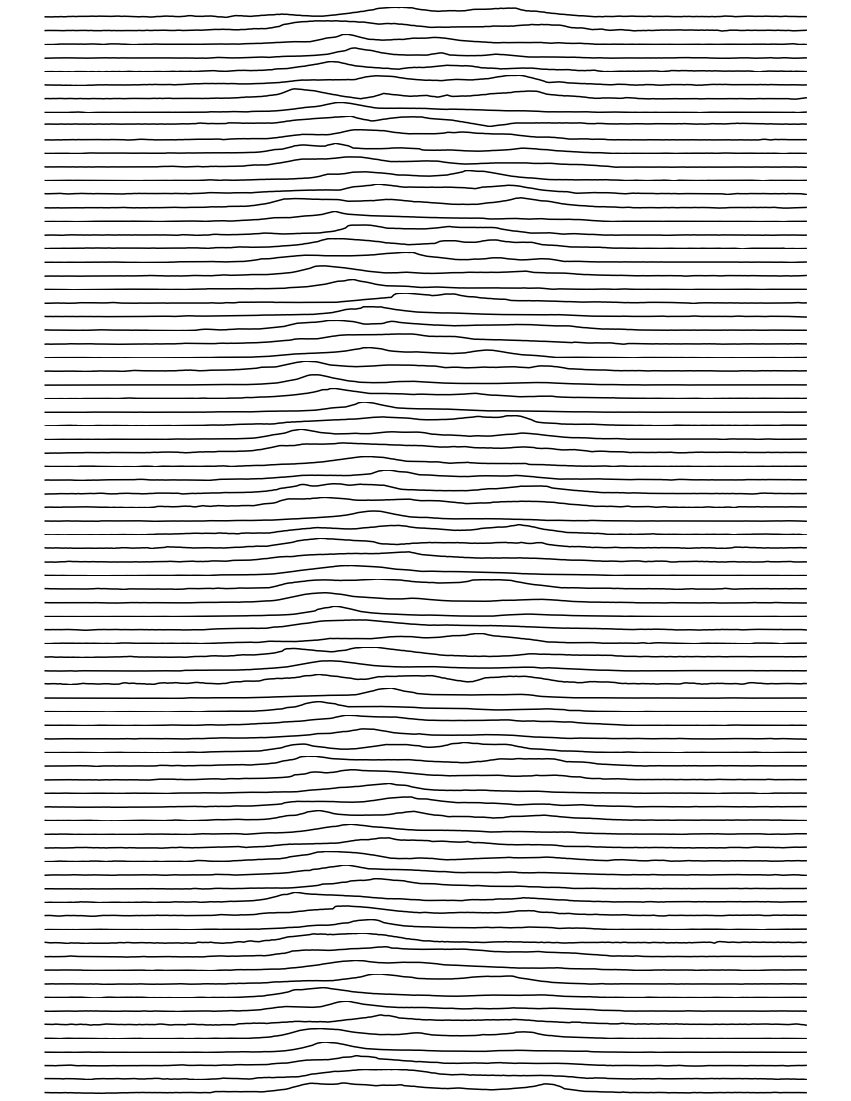

In [28]:
# ANSWER 2
# Plot the pulsar samples in a series of 80 sub-plots.
import matplotlib.pyplot as plt

# need to play with this to get it right
x_size,y_size = 15,20

# get the m onth names from columns
samples = df.columns
fig,axs = plt.subplots(len(df.columns),1,figsize=(x_size,y_size))

# use enumerate in the loop, to get the index
for i,m in enumerate(samples):
    axs[i].plot(df[m],'k')
    axs[i].axis('off')